In [23]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import warnings, scipy.sparse as sp, matplotlib, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import rc_context
from collections import Counter
import matplotlib.font_manager
import matplotlib.lines as lines
#import pyreadr
#import rpy2
#from rpy2.robjects.packages import importr
#import rpy2.robjects as robjects
import magic
#import seaborn as sns
#import palantir
#import loompy
#from scipy.sparse import csgraph

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rc('font', size=14)

pd.set_option('display.max_rows', 200)

sc.set_figure_params(dpi=80, dpi_save=300, color_map='Spectral_r', vector_friendly=True, transparent=True)
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.10.4 anndata==0.11.1 umap==0.5.7 numpy==2.0.2 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.13


# Download "HE_young.h5ad" file from zenodo

In [22]:
adata= sc.read_h5ad('HE_young.h5ad')

## Figures S2A-S2C

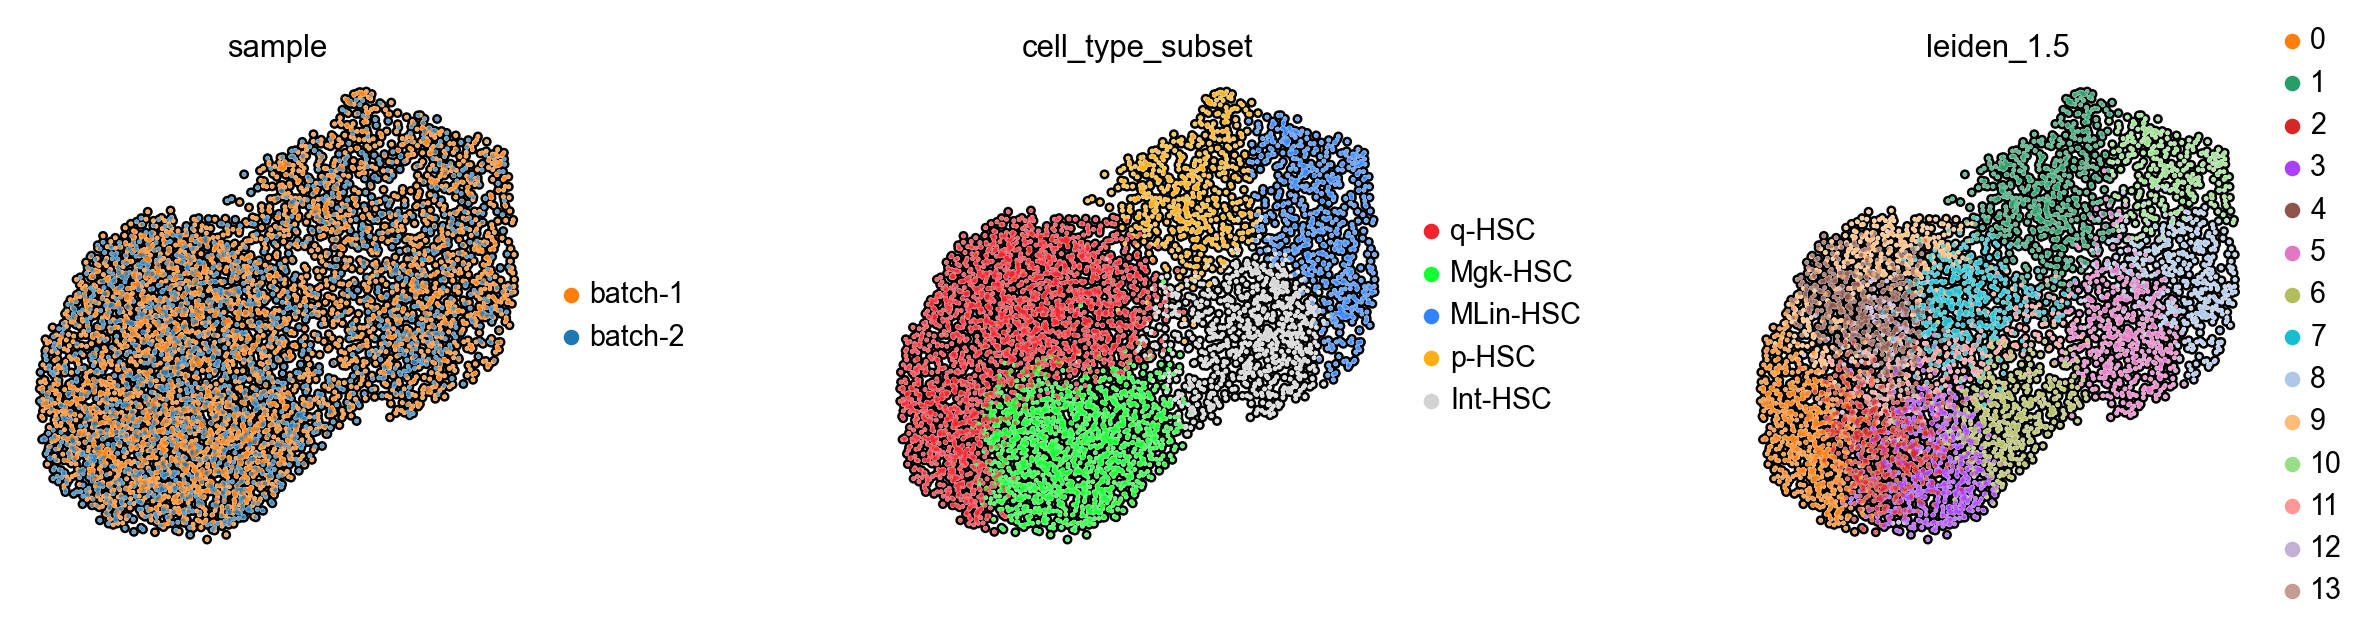

In [86]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)
sc.pl.umap(
    adata, 
    color=[ 'sample', 'cell_type_subset', 'leiden_1.5'], 
    color_map='Spectral_r', 
    use_raw=False,    
    ncols=5,
    wspace = 0.5,
    outline_width=[0.6, 0.05],
    size=15,
    frameon=False,
    add_outline=True,
    sort_order = False
)

## Figure S2E

In [44]:
crosstb = pd.crosstab(adata.obs['kit_id_magic_20'], adata.obs['cell_type_subset'],normalize='index')
diffcrosstb = ((crosstb.loc["Low"] - crosstb.loc["High"]) / (crosstb.loc["Low"] + crosstb.loc["High"]))*100

<Axes: ylabel='cell_type_subset'>

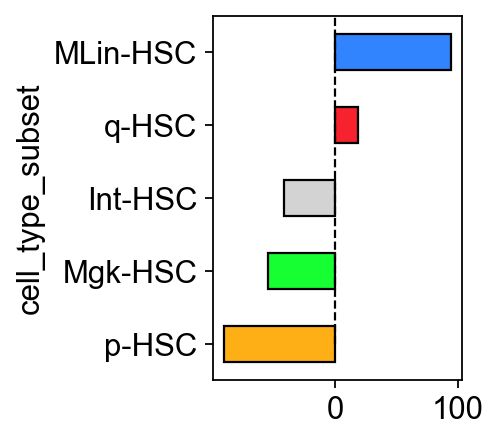

In [45]:
subset_palette = ['#FEAF16','#16FF32','#D3D3D3','#F6222E', '#3283FE']
with rc_context({'figure.figsize': (2, 3)}):
    ax = diffcrosstb.sort_values(ascending=True).plot(kind="barh", stacked=True, edgecolor = "black", color=subset_palette)
    ax.grid(False)
    ax.add_artist(lines.Line2D([0,0], [0,100], color='black',  lw=1,  ls='--'))
    #ax.plot(legend=None)
ax

## Figure 1B

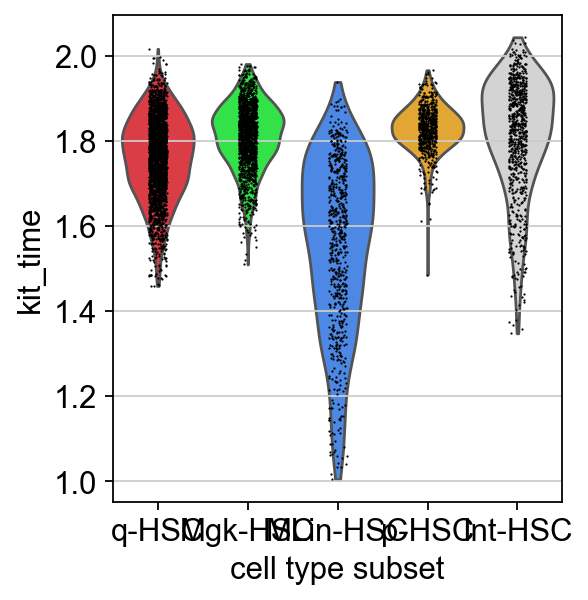

In [59]:
sc.pl.violin(adata,['kit_time'], groupby='cell_type_subset') #save='Kit_HSCsubsets_postMAGIC.pdf')

## Figure 1C

In [46]:
crosstb = pd.crosstab(adata.obs[(adata.obs['kit_id_magic_20']=='High') | (adata.obs['kit_id_magic_20']=='Low')]['kit_id_magic_20'], adata.obs['cell_type_subset'], normalize='index')

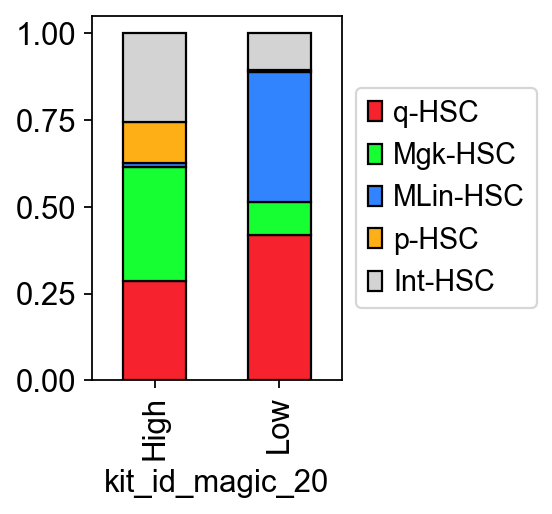

In [47]:
with rc_context({'figure.figsize': (2,3)}):
    ax = crosstb.plot(kind="bar", stacked=True, edgecolor = "black", color=['#F6222E', '#16FF32', '#3283FE', '#FEAF16', '#D3D3D3'])
    ax.grid(False)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.add_artist(lines.Line2D([0,0], [0,100], color='black',  lw=1,  ls='--'))
    #ax.plot(legend=None)
    ax

ranking genes


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['rank_genes_groups_HSC_subtype']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


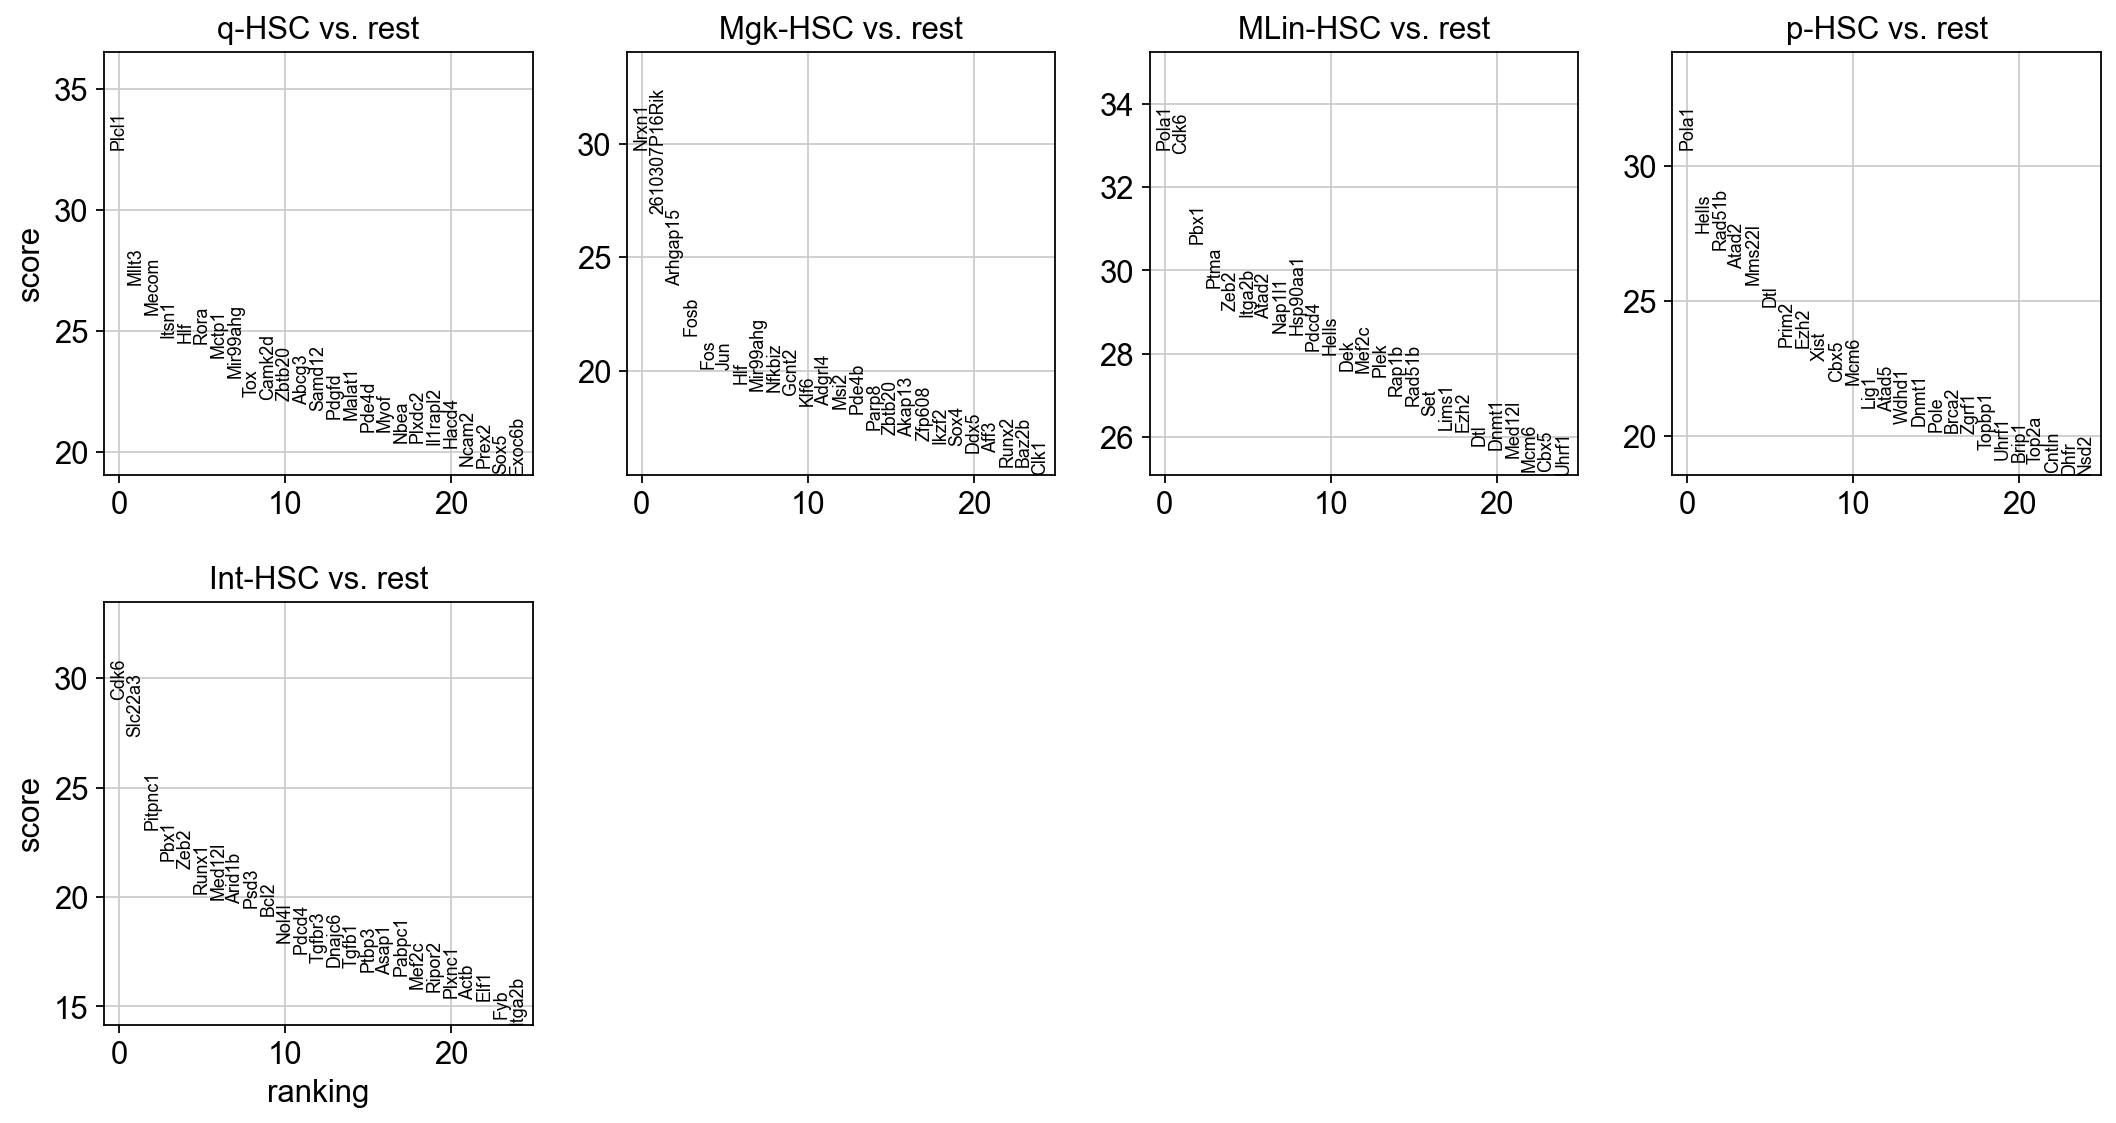

In [49]:
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_subset',use_raw=False, method='wilcoxon', key_added='rank_genes_groups_HSC_subtype')
sc.pl.rank_genes_groups(adata,n_genes=25, sharey=False, key = 'rank_genes_groups_HSC_subtype')

## Figure S2D

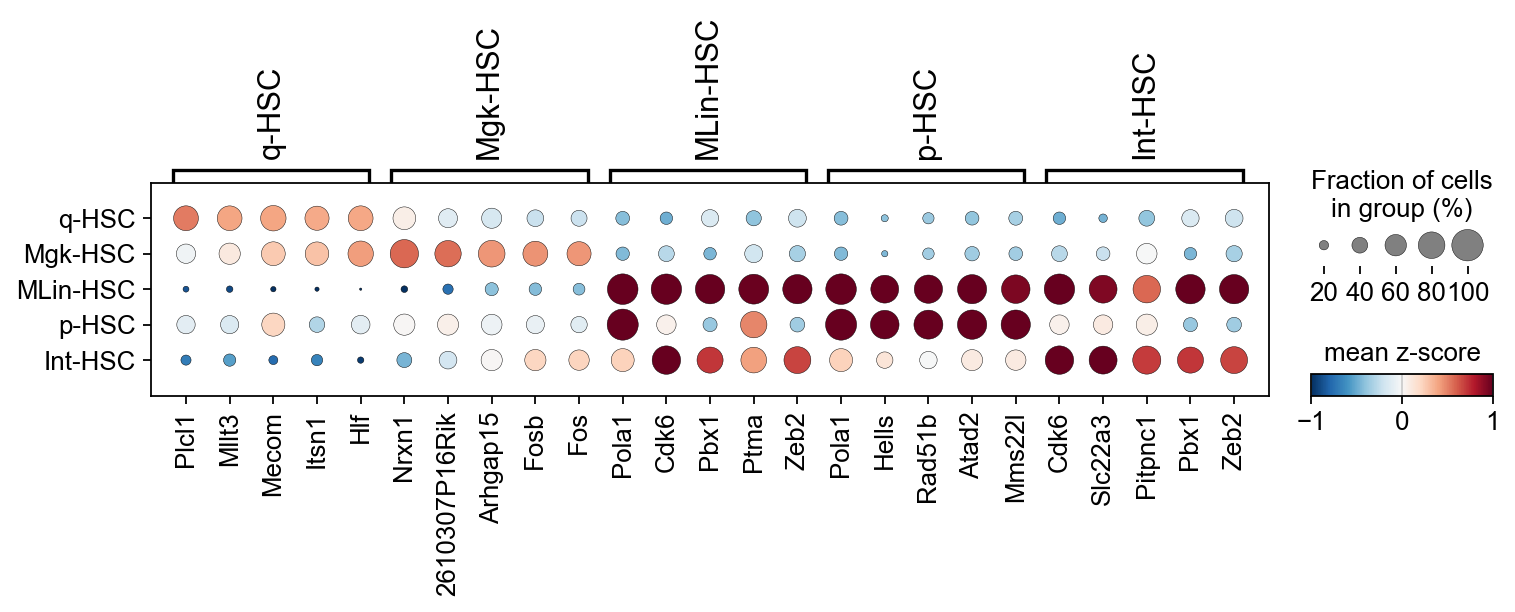

In [53]:
sc.pl.rank_genes_groups_dotplot(adata, groupby='cell_type_subset', vmin=-1, vmax=1, cmap='RdBu_r', layer='scaled', key='rank_genes_groups_HSC_subtype', n_genes=5, colorbar_title="mean z-score", swap_axes=False, dendrogram=False) #save='_HSC_subtype_markergenes_young_040124.pdf')

## Step 2: Prep file for MAST Analysis

In [24]:
adata.X = adata.X.astype('float64')

In [25]:
sce_v2 = sc.AnnData(X = adata.X, 
                 obs = pd.DataFrame({'Cluster_label': adata.obs['cell_type_subset'].astype('str')}, ## choose appropriate astype based on datatype in your column
                                    index = adata.obs.index),
                 var = pd.DataFrame(index = adata.var.index))

In [26]:
sce_v2.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17658133 stored elements and shape (6136, 20531)>

In [27]:
sce_v2.X=sce_v2.X.toarray()
sce_v2.X = sce_v2.X.astype('float64')

In [28]:
sce_v2.write("sce_v2.h5ad")

## Step 3: Run remaining MAST analysis in R notebook 

# Download "HE_young_old.h5ad" file from zenodo

In [2]:
adata = sc.read_h5ad('HE_young_old.h5ad')

## Figures S2I, 1D-1E

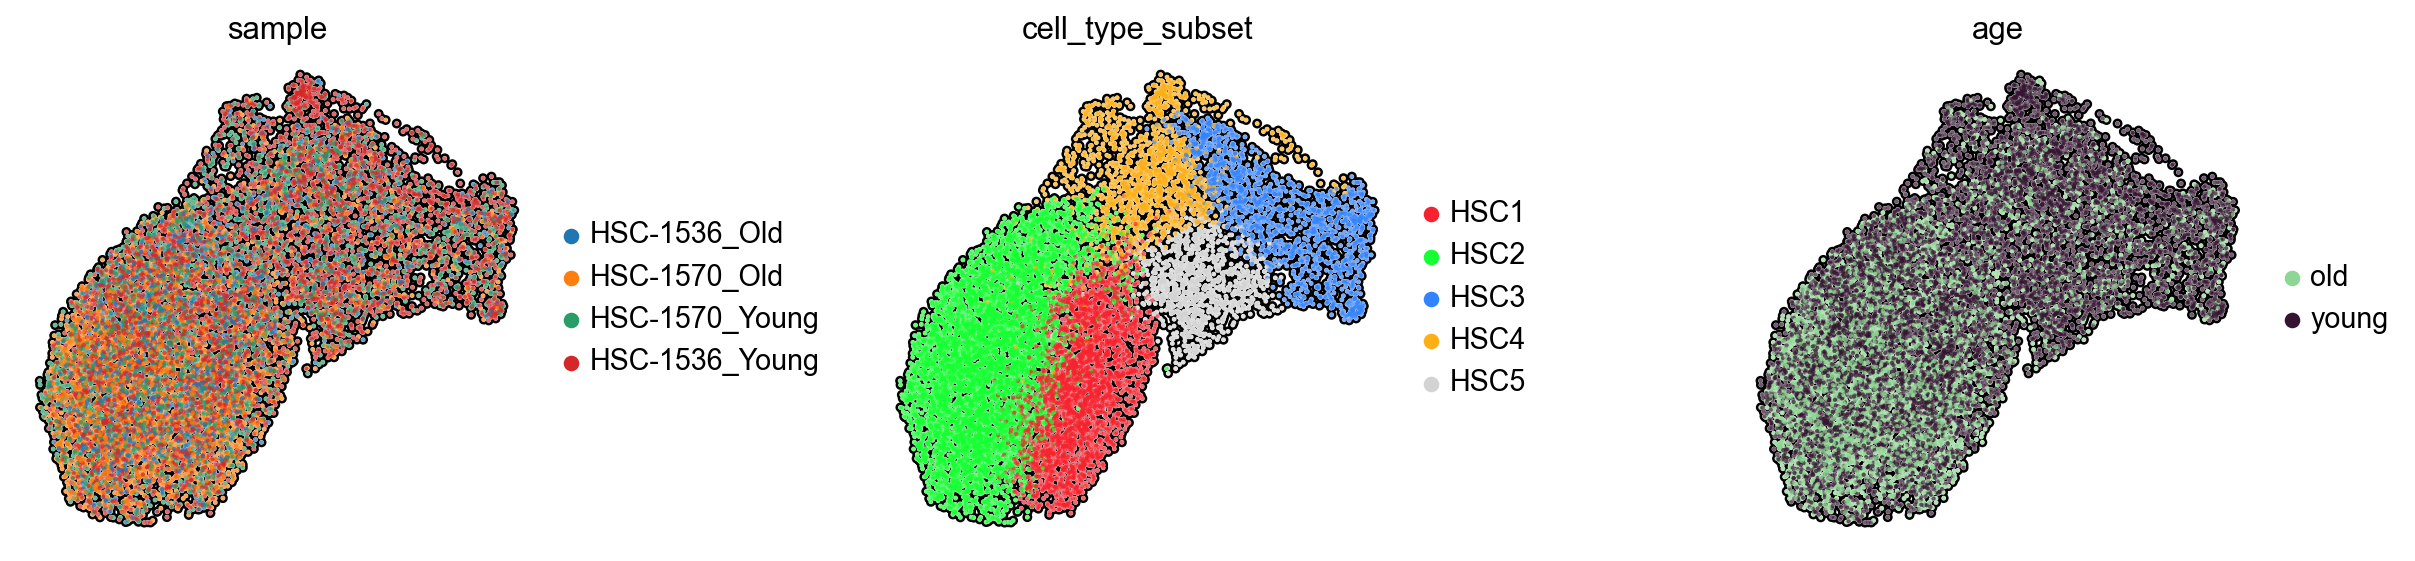

In [4]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)
sc.pl.umap(
    adata, 
    color=[ 'sample', 'cell_type_subset', 'age'], 
    color_map='Spectral_r', 
    use_raw=False,    
    ncols=5,
    wspace = 0.5,
    outline_width=[0.6, 0.05],
    size=15,
    frameon=False,
    add_outline=True,
    sort_order = False
)

In [6]:
import magic

In [7]:
magic_op = magic.MAGIC()

In [8]:
magic_op.set_params(knn=5, t=4)

MAGIC(knn_max=15, t=4)

In [9]:
HSC_genes = ['Kit', 'Pdzk1ip1','Hlf','Itgb3','Neo1','Cd244a', 'Hoxb5', 'Itga2', 'Procr', 'Ly9']

In [10]:
adata_magic = magic_op.fit_transform(adata, genes= HSC_genes)

Calculating MAGIC...
  Running MAGIC on 12347 cells and 21665 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/Users/eliash/.local/lib/python3.12/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 8.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 9.88 seconds.
    Calculating affinities...
    Calculated affinities in 9.87 seconds.
  Calculated graph and diffusion operator in 28.72 seconds.
  Calculating imputation...
Calculated MAGIC in 29.25 seconds.


In [11]:
adata_magic.uns['age_colors'] = adata.uns['age_colors'] 
adata_magic.uns['cell_type_subset_colors'] = adata.uns['cell_type_subset_colors'] 

In [12]:
adata_magic.obs['kit_time'] = pd.DataFrame(adata_magic.X, columns=adata_magic.var.index)['Kit'].values

In [13]:
import scvelo as scv

## Figure 1G

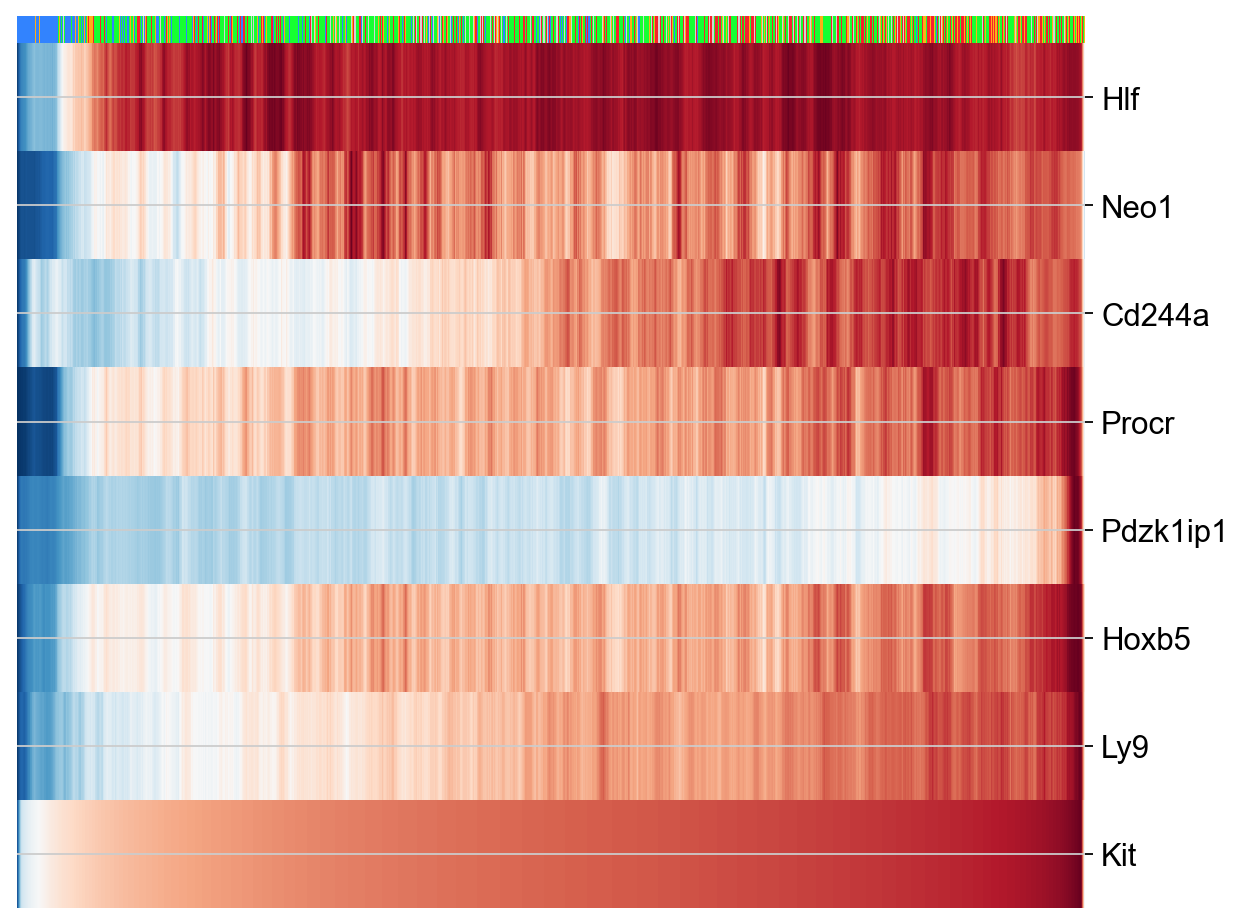

In [15]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)
scv.pl.heatmap(adata_magic, var_names=['Kit', 'Pdzk1ip1','Hlf','Neo1','Cd244a', 'Hoxb5', 'Procr', 'Ly9'], sortby='kit_time', color_map='RdBu_r',col_color='cell_type_subset', colorbar =True, n_convolve=100, figsize=(8,6))#save='_HSCgenes_heatmap_HSCsubsets_MAGIC_112524.pdf' )

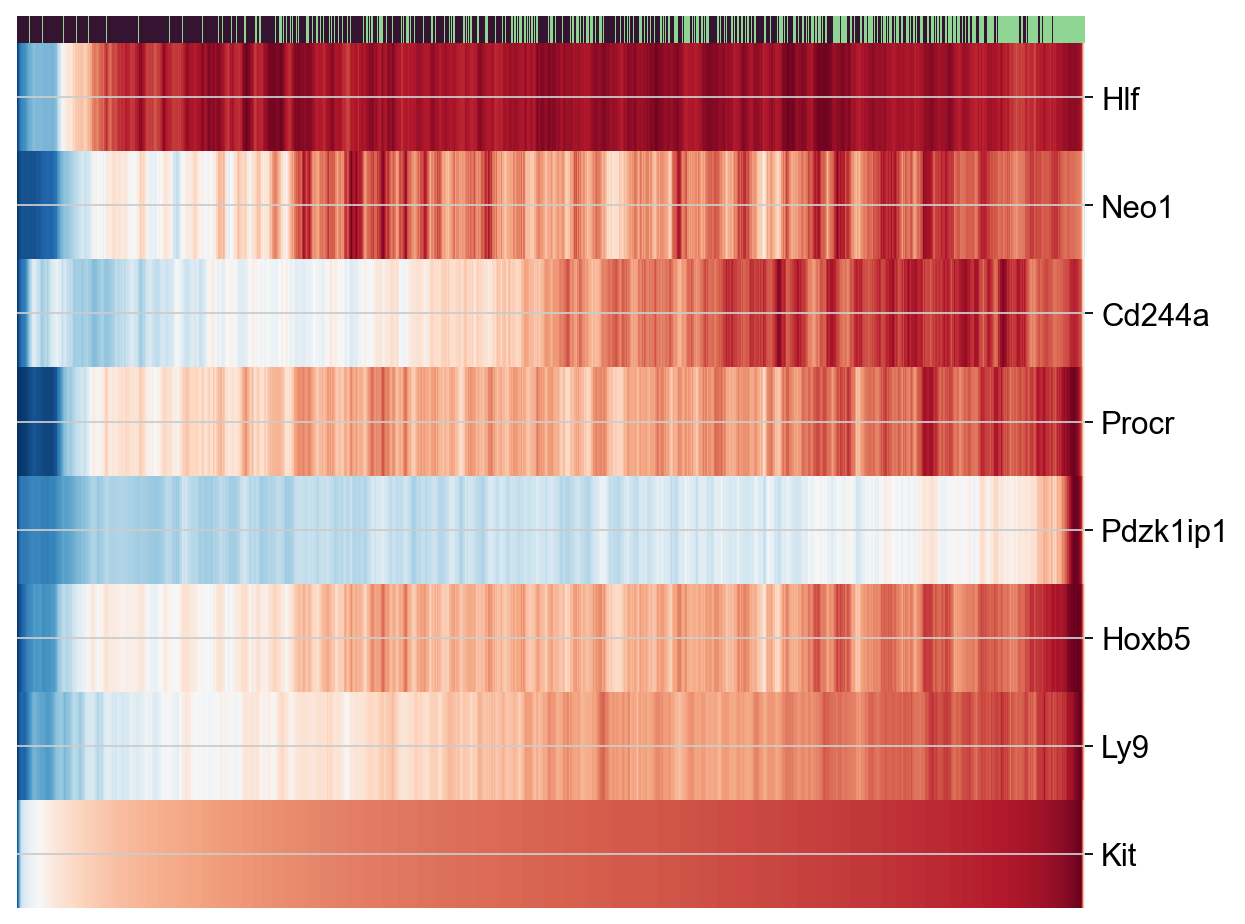

In [16]:
sc.set_figure_params(dpi=80, dpi_save=300, vector_friendly=True, transparent=True)
scv.pl.heatmap(adata_magic, var_names=['Pdzk1ip1','Hlf','Neo1','Cd244a', 'Hoxb5', 'Procr', 'Ly9', 'Kit'], sortby='kit_time', color_map='RdBu_r', col_color='age', colorbar =True, n_convolve=100, figsize=(8,6)) #save='_HSCgenes_heatmap_age_MAGIC_112524.pdf' )

## Figure 1H

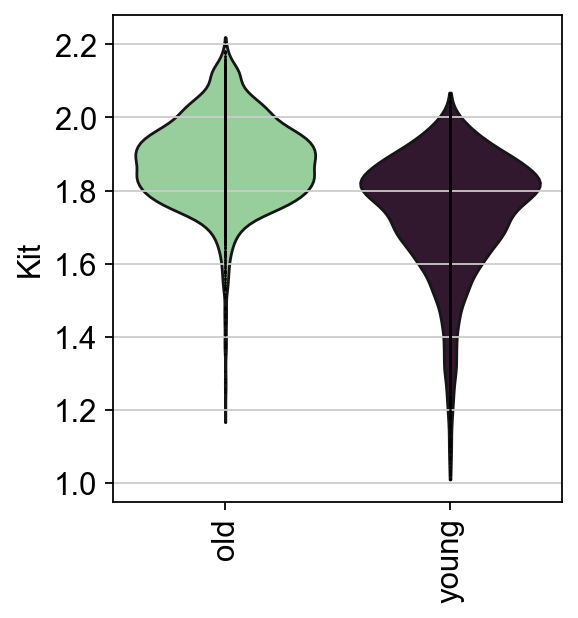

In [17]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)
sc.pl.violin(adata_magic, ['Kit'], groupby='age', rotation=90, jitter=False) #save='_HSCgenes_violin_MAGIC.pdf')

In [18]:
import seaborn as sns 

## Figure S2J

In [24]:
crosstb = pd.crosstab(adata.obs['age'], adata.obs['cell_type_subset'], normalize='index')
diffcrosstb = ((crosstb.loc["young"] - crosstb.loc["old"]) / (crosstb.loc["young"] + crosstb.loc["old"]))*100

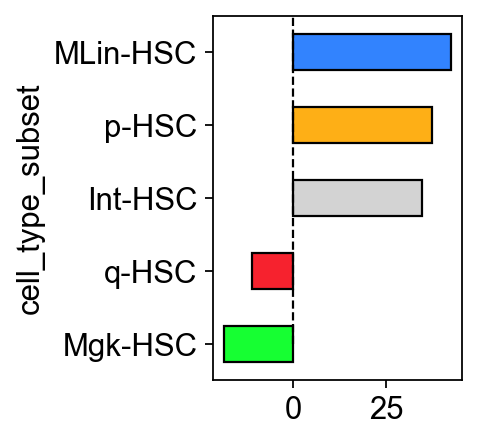

In [25]:
subset_palette = ['#16FF32','#F6222E','#D3D3D3','#FEAF16', '#3283FE']
with rc_context({'figure.figsize': (2, 3)}):
    ax = diffcrosstb.sort_values(ascending=True).plot(kind="barh", stacked=True, edgecolor = "black", color=subset_palette)
    ax.grid(False)
    ax.add_artist(lines.Line2D([0,0], [0,100], color='black',  lw=1,  ls='--'))
    #ax.plot(legend=None)
    #plt.savefig('figures/age-Fraticelli_delta.pdf', bbox_inches='tight')

## Figure S2M

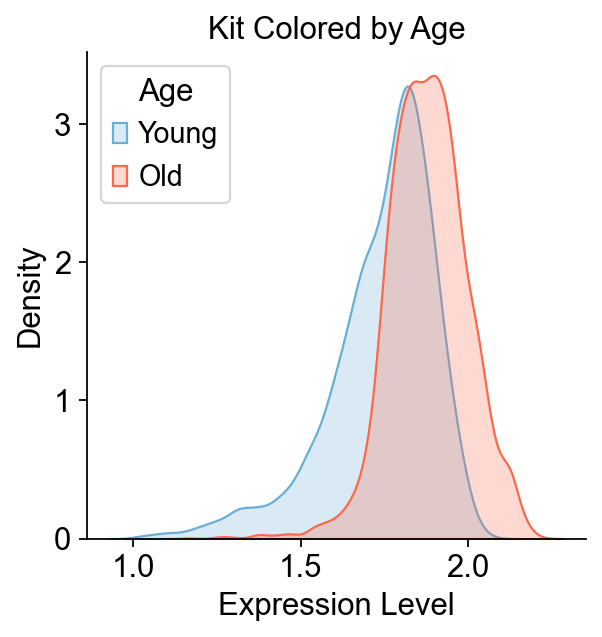

In [19]:
# Filter cells based on age metadata
young_cells = adata_magic[adata_magic.obs['age'] == 'young']
old_cells = adata_magic[adata_magic.obs['age'] == 'old']

# Get the gene expression values for young samples
kit_young = young_cells[:, 'Kit'].X

# Create the KDE plot for young samples
sns.kdeplot(data=kit_young, color='blue', fill= True, label='Young', palette='Blues')


# Get the gene expression values for old samples
kit_old = old_cells[:, 'Kit'].X

# Create the KDE plot for old samples
sns.kdeplot(data=kit_old, color='red', fill= True, label='Old',palette='Reds' )

# Add labels and title to the plot
plt.xlabel('Expression Level')
plt.ylabel('Density')
plt.title(f'Kit Colored by Age')

# Remove the right and top spines
sns.despine()

# Remove gridlines
plt.grid(False)

# Show the legend
plt.legend(title='Age', loc='upper left')

# Show the plot
plt.show()


In [23]:
adata.uns['cell_type_subset_colors'] = [ '#F6222E', '#16FF32', '#3283FE', '#FEAF16', '#D3D3D3']

In [292]:
import matplotlib.lines as lines

## Figure 1F

In [26]:
crosstb = pd.crosstab(adata.obs['age'], adata.obs['cell_type_subset'], normalize='index')

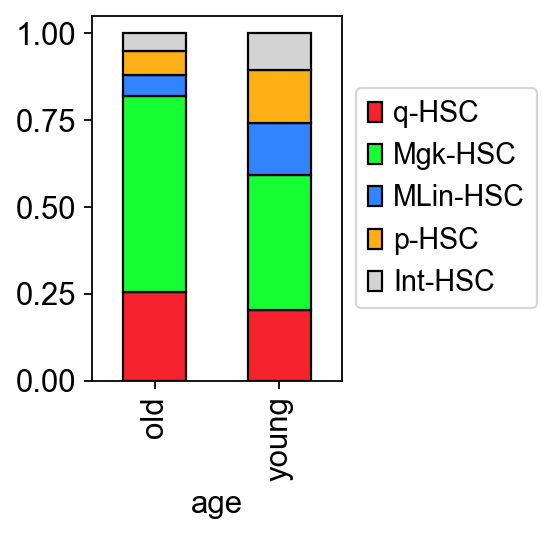

In [27]:
with rc_context({'figure.figsize': (2,3)}):
    ax = crosstb.plot(kind="bar", stacked=True, edgecolor = "black", color=['#F6222E', '#16FF32', '#3283FE', '#FEAF16', '#D3D3D3'])
    ax.grid(False)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #ax.add_artist(lines.Line2D([0,0], [0,100], color='black',  lw=1,  ls='--'))
    #ax.plot(legend=None)
    ax

## File prep for MiloR analysis

In [29]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")
adata_no_knn

AnnData object with n_obs × n_vars = 12347 × 21665
    obs: 'sample', 'age', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'original_total_counts', 'log10_original_total_counts', 'mito_frac', 'ribo_frac', 'hb_frac', 'doublet_score', 'predicted_doublet', 'n_counts', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_1.2', 'kit_time', 'kit_id_magic', 'qHSC1', 'qHSC2', 'HSC1', 'HSC2', 'HSC3', 'HSC4', 'Megakaryocyte', 'Ly_genes', 'LMPP_MLP_TF', 'Young', 'Old', 'Gildai', 'Wilson_etal', 'Lauridsen_etal', 'Yiran_etal_MultiLin', 'Yiran_etal_Plt', 'cell_type_subset', 'agekit', 'agekit1', 'ageHSCcluster', 'leiden_1.8', 'kit_id_magic_30', 'kit_id_magic_10', 'kit_id_magic_20', 'kit_id_unmagic_20', 'kit_id_unmagic_1

In [30]:
adata_no_knn.obs['batch'] = np.where(
    adata_no_knn.obs['sample'].str.contains('1536'), 'batch1',
    np.where(adata_no_knn.obs['sample'].str.contains('1570'), 'batch2', 'unknown')
)

In [31]:
adata_no_knn.write("adata_no_knn.h5ad")

## Step 6: Run remaining MiloR analysis in R notebook 